# Exercise 3
### Anton Wiehe & Angelie Kraftelie

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Test image
im_frame = Image.open("positives/" + 'p01.png')
np_frame = np.array(im_frame.getdata())

# Load images (30, 573, 3) == (num_images, num_pixels, rgb)
n = 30
positives = np.zeros((n, 576, 3))
for i in range(n):
    im_frame = Image.open("positives/" + 'p' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    positives[i] = np.array(im_frame.getdata())
    
negatives = np.zeros((n, 576, 3))
for i in range(n):
    im_frame = Image.open("negatives/" + 'n' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    negatives[i] = np.array(im_frame.getdata())

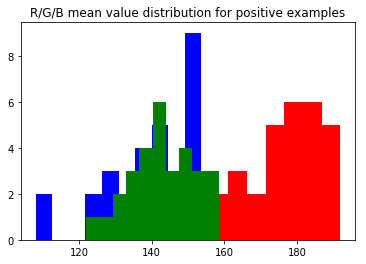

In [3]:
red_pos = positives[:, :, 0]
green_pos = positives[:, :, 1]
blue_pos = positives[:, :, 2]

red_mean_pos = np.mean(red_pos, axis=1)
blue_mean_pos = np.mean(green_pos, axis=1)
green_mean_pos = np.mean(blue_pos, axis=1)

plt.hist(red_mean_pos, color="red")
plt.hist(blue_mean_pos, color="blue")
plt.hist(green_mean_pos, color="green")
plt.title("R/G/B mean value distribution for positive examples")
plt.show()


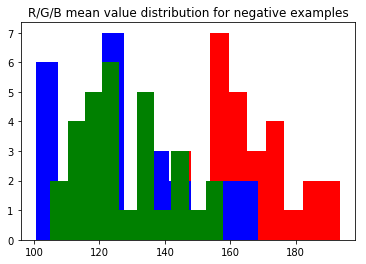

In [4]:
red_neg = negatives[:, :, 0]
green_neg = negatives[:, :, 1]
blue_neg = negatives[:, :, 2]

red_mean_neg = np.mean(red_neg, axis=1)
blue_mean_neg = np.mean(green_neg, axis=1)
green_mean_neg = np.mean(blue_neg, axis=1)

plt.hist(red_mean_neg, color="red")
plt.hist(blue_mean_neg, color="blue")
plt.hist(green_mean_neg, color="green")
plt.title("R/G/B mean value distribution for negative examples")
plt.show()

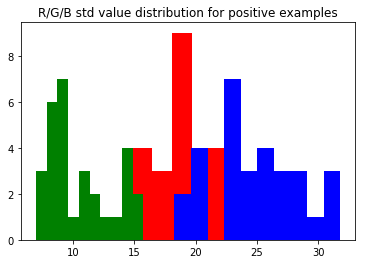

In [5]:
red_std_pos = np.std(red_pos, axis=1)
blue_std_pos = np.std(green_pos, axis=1)
green_std_pos = np.std(blue_pos, axis=1)

plt.hist(red_std_pos, color="red")
plt.hist(blue_std_pos, color="blue")
plt.hist(green_std_pos, color="green")
plt.title("R/G/B std value distribution for positive examples")
plt.show()

(30,)
(30,)


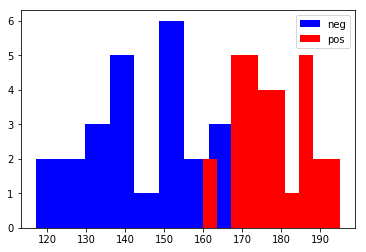

In [161]:
red_std_neg = np.std(red_neg, axis=1)
blue_std_neg = np.std(green_neg, axis=1)
green_std_neg = np.std(blue_neg, axis=1)


max_five_pixels_red_pos = np.mean(np.sort(red_pos, axis=1)[:, -5:], axis=1)
max_five_pixels_blue_pos = np.mean(np.sort(blue_pos, axis=1)[:, -5:], axis=1)
max_five_pixels_green_pos = np.mean(np.sort(green_pos, axis=1)[:, -5:], axis=1)

max_five_pixels_red_neg = np.mean(np.sort(red_neg, axis=1)[:, -5:], axis=1)
max_five_pixels_blue_neg = np.mean(np.sort(blue_neg, axis=1)[:, -5:], axis=1)
max_five_pixels_green_neg = np.mean(np.sort(green_neg, axis=1)[:, -5:], axis=1)

#plt.hist(red_std_neg, color="red")
#plt.hist(blue_std_neg, color="blue")
#plt.hist(green_std_neg, color="green")
#plt.title("R/G/B std value distribution for negative examples")
#plt.show()

print(np.shape(red_std_neg))
print(np.shape(max_five_pixels_red_neg))
plt.hist(max_five_pixels_green_neg, color="blue", label="neg")
plt.hist(max_five_pixels_green_pos, color="red", label="pos")
plt.legend()
plt.show()

In [135]:
pos_features = np.concatenate([np.reshape(red_mean_pos, (n, 1)), np.reshape(green_mean_pos, (n, 1)),
                              np.reshape(blue_mean_pos, (n, 1)), np.reshape(red_std_pos, (n, 1)),
                              np.reshape(blue_std_pos, (n, 1)), np.reshape(green_std_pos, (n, 1)), 
                              np.reshape(max_five_pixels_red_pos, (n, 1)), np.reshape(max_five_pixels_blue_pos, (n, 1))
                            , np.reshape(max_five_pixels_green_pos, (n, 1))], axis=1)
neg_features = np.concatenate([np.reshape(red_mean_neg, (n, 1)), np.reshape(green_mean_neg, (n, 1)),
                              np.reshape(blue_mean_neg, (n, 1)), np.reshape(red_std_neg, (n, 1)),
                              np.reshape(blue_std_neg, (n, 1)), np.reshape(green_std_neg, (n, 1)), 
                              np.reshape(max_five_pixels_red_neg, (n, 1)), np.reshape(max_five_pixels_blue_neg, (n, 1))
                            , np.reshape(max_five_pixels_green_neg, (n, 1))], axis=1)
num_features = np.shape(pos_features)[1]
np.shape(pos_features)

(30, 9)

In [136]:
def split_test_train(features_0, features_1):
    test_split_percentage = 0.05
    number_of_tests = int(n * 2 * 0.1)

    test_idxs = np.random.randint(0, n * 2, number_of_tests)
    both = np.concatenate((features_0, features_1), axis=0)
    test_features = both[test_idxs,:]
    test_labels = (test_idxs >= 30)

    #print("Test idxs: ", test_idxs)
    idxs_0 = test_idxs[test_idxs < n]
    idxs_1 = test_idxs[test_idxs >= n] - n

    features_0 = np.delete(features_0, idxs_0, axis=0)
    features_1 = np.delete(features_1, idxs_1, axis=0)
    
    return features_0, features_1, test_features, test_labels

In [137]:
# Shuffle two lists in same order
def shuffle(a,b):
    assert len(a) == len(b)
    idxs = np.arange(0, len(a), 1)
    np.random.shuffle(idxs)
    return a[idxs], b[idxs]

In [138]:
def k_fold(features_0, features_1, k=10):
    num_features = len(features_0[0])
    split_percentage = 1 / k
    samples_per_split = (len(features_0) + len(features_1)) // k
    both_features = np.concatenate((features_0, features_1), axis=0)
    both_labels = np.concatenate((np.zeros(len(features_0)), np.ones(len(features_1))), axis=0)
    splits = np.zeros((k, samples_per_split, num_features))
    splits_labels = np.zeros((k, samples_per_split))
    for i in range(k):
        split_idxs = np.random.randint(0, len(both_features), samples_per_split)
        split_labels = both_labels[split_idxs]
        split = both_features[split_idxs]

        splits[i] = split
        splits_labels[i] = split_labels

        both_labels = np.delete(both_labels, split_idxs, axis=0)
        both_features = np.delete(both_features, split_idxs, axis=0)

    return splits, splits_labels
    

In [139]:
def evaluate_k_fold(splits, split_labels):
    train_accuracies = np.zeros(len(splits))
    test_accuracies = np.zeros(len(splits))
    
    train_accuracies = []
    test_accuracies = []
    for i in range(len(splits)):
        features = np.concatenate((splits[0:i], splits[i + 1:]), axis=0)
        labels = np.concatenate((split_labels[0:i], split_labels[i + 1:]), axis=0)
        test_features = splits[i]
        test_labels = split_labels[i]
        features_0 = features[labels == 0]
        features_1 = features[labels == 1]
        
        print(np.shape(splits))
        print(np.shape(split_labels))
        features = np.reshape(features, ((len(features) * len(features[0]), len(features[0][0]))))
        labels = np.reshape(labels, (len(labels) * len(labels[0])))

        
        test_accuracy = train_and_test(features_0, features_1, test_features, test_labels)
        test_accuracies.append(test_accuracy)
        train_accuracy = train_and_test(features_0, features_1, features, labels)
        train_accuracies.append(train_accuracy)
        
        print("Split ", i ,)
        print(" Test Accuracy: ", test_accuracy)
        print(" Train Accuracy: ", train_accuracy)
        print()
        
    return np.mean(train_accuracies), np.mean(test_accuracies)
        

In [156]:
folds, labels = k_fold(pos_features, neg_features, 6)

train, test = evaluate_k_fold(folds, labels)
print("Overall train - test accuracy: ", train, test)

(6, 10, 9)
(6, 10)
Difficult features:  [164.32638889 132.17881944 115.03125     18.17166593  24.91023598
   7.91387907 190.6        157.4        151.8       ]
Split  0
 Test Accuracy:  1.0
 Train Accuracy:  0.98

(6, 10, 9)
(6, 10)
Difficult features:  [164.32638889 132.17881944 115.03125     18.17166593  24.91023598
   7.91387907 190.6        157.4        151.8       ]
Split  1
 Test Accuracy:  0.9
 Train Accuracy:  1.0

(6, 10, 9)
(6, 10)
Difficult features:  [164.32638889 132.17881944 115.03125     18.17166593  24.91023598
   7.91387907 190.6        157.4        151.8       ]
Split  2
 Test Accuracy:  1.0
 Train Accuracy:  0.98

(6, 10, 9)
(6, 10)
Difficult features:  [164.32638889 132.17881944 115.03125     18.17166593  24.91023598
   7.91387907 190.6        157.4        151.8       ]
Split  3
 Test Accuracy:  1.0
 Train Accuracy:  0.98

(6, 10, 9)
(6, 10)
Difficult features:  [164.32638889 132.17881944 115.03125     18.17166593  24.91023598
   7.91387907 190.6        157.4       

In [25]:
# Calculate Parameters:
def calculate_parameters(features_0, features_1):
    phi = len(features_0) / (len(features_0) + len(features_1))
    mu_0 = np.mean(pos_features, axis=0)
    mu_1 = np.mean(neg_features, axis=0)
    #temp_0 = (pos_features - mu_0) @ (pos_features - mu_0)
    temp_0 = np.array([np.reshape((feature_vec - mu_0), (num_features, 1)) @ np.reshape(feature_vec - mu_0, (1, num_features)) for feature_vec in pos_features])
    #print(np.shape(temp_0))
    #temp_1 = (neg_features - mu_1) @ (neg_features - mu_1)
    temp_1 = np.array([(feature_vec - mu_1).reshape(num_features, 1) @ (feature_vec - mu_1).reshape(1, num_features) for feature_vec in neg_features])

    sigma = np.mean(np.concatenate([temp_0, temp_1], axis=0), axis=0)
    
    return phi, mu_0, mu_1, sigma

In [26]:
#print(sigma)
#print(np.shape(np.concatenate([temp_0, temp_1])))
#print(np.shape(sigma))


In [83]:
def likelihood(x, mu, sigma):
    n_umberOfFeatures = len(mu)
    n = n_umberOfFeatures
    denominator = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(sigma) ** (1/2))
    #print("Denominator: ", denominator)
    nominator = np.exp(-(1/2) * np.transpose(x - mu) @ np.linalg.inv(sigma) @ (x - mu))
    #print("Nominator: ", nominator)
    return nominator / denominator

In [104]:
def classify(x, phi, mu_0, mu_1, sigma):
    prob_0 = likelihood(x, mu_0, sigma) * phi
    prob_1 = likelihood(x, mu_1, sigma) * (1 - phi)
    
    #print("Prob 0: ", prob_0)
    #print("Prob 1: ", prob_1)
    #print("Ratio:", prob_0 / prob_1)
    if prob_0 > prob_1:
        #print("Predicted: 0 - positive")
        return 0
    else:
        #print("Predicted: 1 - negative")
        return 1

In [120]:
def train_and_test(features_0, features_1, test_features, test_labels):
    phi, mu_0, mu_1, sigma = calculate_parameters(features_0, features_1)
    
    n_correct = 0
    for i in range(len(test_features)):
        correct = test_labels[i] == classify(test_features[i], phi, mu_0, mu_1, sigma)
        n_correct += correct
        if not correct:
            print("Difficult features: ", test_features[i])
    return n_correct / len(test_features) 
    

In [20]:
sample = pos_features[0]
neg_sample = neg_features[0]

correct = 0
for i in range(len(both)):
    sample = both[i]
    prediction = classify(sample, mu_0, mu_1, sigma)
    if prediction == 0 and i < 30 or prediction == 1 and i >= 30:
        correct += 1
        #print("Correct!")
        #print()
    else:
        #print("Wrong")
        print("Wrong idx: ", i)
        print()
print("Training Accuracy: ", round(correct / len(both) * 100, 2))

NameError: name 'both' is not defined

In [21]:
correct = 0
for i in range(len(test_features)):
    sample = neg_features[i]
    prediction = classify(sample, mu_0, mu_1, sigma)
    if prediction == test_labels[i]:
        correct += 1
    #print("Prediction: ", prediction)
    #print("Label: ", int(test_labels[i]))
    #print()
print("Test Accuracy: ", round(correct / len(test_features) * 100, 2))

NameError: name 'test_features' is not defined

In [22]:
folds, labels = k_fold(pos_features, neg_features, 10)

TypeError: 'int' object is not iterable